# **Air Quality Comparator**

This notebook loads the Birmingham and Bristol subet of the Kaggle UK air quality dataset, 
performs data preprocessing, data visualisation, performs comparative analysis, and a predictive model.

## Objectives

* The primary objective of the notebook is to compare the air quality between two major cities in the UK - Birmingham and Bristol Data Analytics and Machine Learning.
* The secondary objective is to use the dataset to perform air quality predictive analytics. 

## Inputs

* The notebook uses a subset (Birmingham and Bristol) of the Kaggle UK Air Quality dataset to perform comparative analytics and predictive analytics. 

## Outputs

* Code, plots, comparative visualisations and a predictive model were writen, ploted and built at various steps in the notebook






---

### Import Important Libraries

* This importants all the libraries needed for the project 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

plt.style.use("seaborn-v0_8")
pd.set_option("display.max_columns", None)

### Load Dataset

* This loads the dataset on to the Jupyter Notebook

In [22]:
# Load dataset

df = pd.read_csv(r'../data/air_brum_bris.csv')



### Exploratory Data Analysis - EDA

* The following cells conduct a number of EDA steps to understand, clean and prepare the data for data analytics

In [ ]:
# Data preprocessing and cleaning
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
df[['nox', 'no2', 'no']] = df[['nox', 'no2', 'no']].interpolate(method='time', limit_direction='both')

# Check for missing values
print(df[['nox', 'no2', 'no']].isna().sum())


nox    0
no2    0
no     0
dtype: int64


In [ ]:
# check the first few rows of the cleaned data
df[['nox', 'no2', 'no']].head()

,nox,no2,no
date,,,
2016-09-09 00:00:00,4.48864,4.02390,0.30309
2016-09-09 01:00:00,3.42481,2.72866,0.45402
2016-09-09 02:00:00,3.77241,3.24982,0.34083
2016-09-09 03:00:00,4.81807,4.35333,0.30309
2016-09-09 04:00:00,6.38488,5.68778,0.45464


In [27]:
# Display dataset shape
print(f"Dataset shape: {df.shape}")

Dataset shape: (243840, 21)


In [28]:
# Display basic statistics
print(df[['nox', 'no2', 'no']].describe())


                 nox            no2             no
count  243840.000000  243840.000000  243840.000000
mean       52.502446      26.980946      16.619498
std        67.256414      19.500981      34.196170
min        -0.430310      -0.526350      -0.995770
25%        15.204380      11.864670       1.577640
50%        30.759930      22.243675       4.771940
75%        63.111930      37.640935      16.895725
max      1325.370310     244.910900     704.657270


In [29]:
# Display data types and info
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 243840 entries, 2016-09-09 00:00:00 to 2023-11-06 23:00:00
Data columns (total 21 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  243840 non-null  int64  
 1   site        243840 non-null  object 
 2   code        243840 non-null  object 
 3   co          0 non-null       float64
 4   nox         243840 non-null  float64
 5   no2         243840 non-null  float64
 6   no          243840 non-null  float64
 7   o3          169657 non-null  float64
 8   so2         30705 non-null   float64
 9   pm10        224612 non-null  float64
 10  pm2.5       175342 non-null  float64
 11  v10         58887 non-null   float64
 12  v2.5        58178 non-null   float64
 13  nv10        58887 non-null   float64
 14  nv2.5       58178 non-null   float64
 15  ws          207648 non-null  float64
 16  wd          207648 non-null  float64
 17  air_temp    207648 non-null  float64
 18  latitude  

In [25]:
# Save cleaned dataset

df_dates = df.copy()
df_dates.to_csv('../data/air_brum_bris_cleaned_dates.csv', index=True)

array([[<Axes: title={'center': 'nox'}>, <Axes: title={'center': 'no2'}>,
        <Axes: title={'center': 'no'}>]], dtype=object)

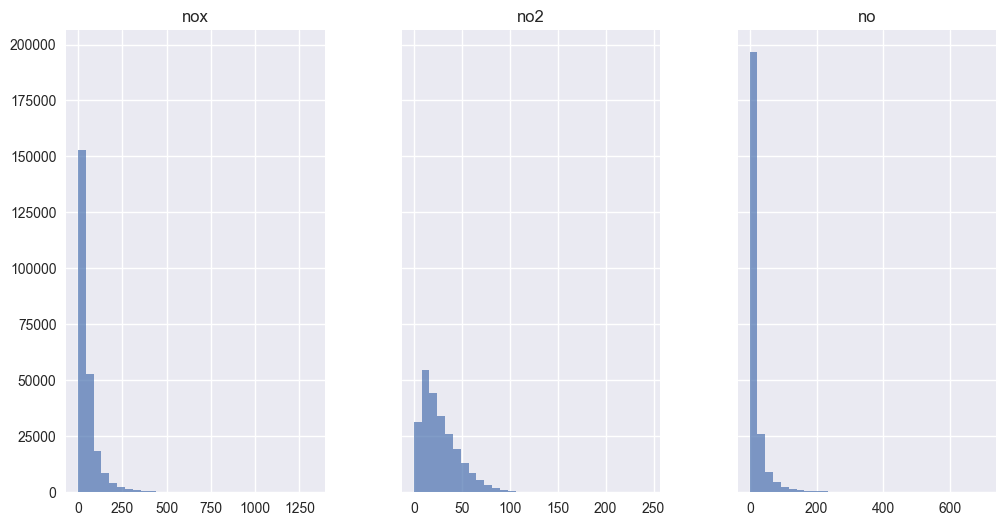

In [30]:
# Visualize distributions of pollutants

df[['nox', 'no2', 'no']].hist(bins=30, figsize=(12, 6), alpha=0.7, layout=(1, 3), sharey=True)  

<Axes: title={'center': 'Nitrogen Oxides Levels in Birmingham and Bristol (2016-2020)'}, xlabel='date'>

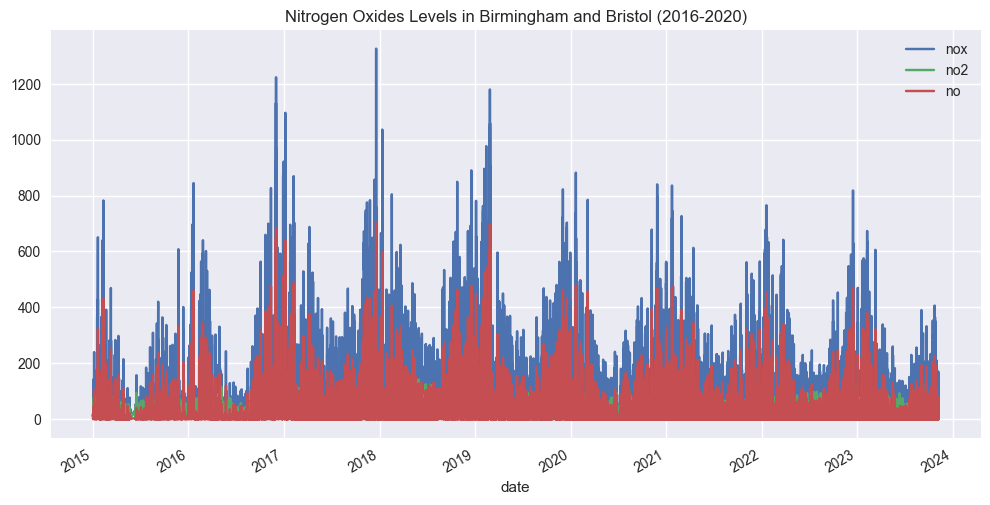

In [31]:
# Time series plot of pollutants

df[['nox', 'no2', 'no']].plot(title='Nitrogen Oxides Levels in Birmingham and Bristol (2016-2020)', figsize=(12, 6))    


In [34]:
df.columns


Index(['Unnamed: 0', 'site', 'code', 'co', 'nox', 'no2', 'no', 'o3', 'so2',
       'pm10', 'pm2.5', 'v10', 'v2.5', 'nv10', 'nv2.5', 'ws', 'wd', 'air_temp',
       'latitude', 'longitude', 'site_type'],
      dtype='object')

In [ ]:
# Subset data for the week of June 22 to June 29, 2023
df.index.year.unique()
df_2023_06_22_29 = df[(df.index >= '2023-06-22 00:00:00') & (df.index <= '2023-06-29 23:59:59')]
df_2023_06_22_29.head()

,Unnamed: 0,site,code,co,nox,no2,no,o3,so2,pm10,pm2.5,v10,v2.5,nv10,nv2.5,ws,wd,air_temp,latitude,longitude,site_type
date,,,,,,,,,,,,,,,,,,,,,
2023-06-22 00:00:00,922825,Birmingham A4540 Roadside,BIRR,NaN,53.34920,47.69207,3.68949,4.98925,NaN,12.075,7.594,NaN,NaN,NaN,NaN,1.4,279.7,12.5,52.476145,-1.874978,Urban Traffic
2023-06-22 01:00:00,922826,Birmingham A4540 Roadside,BIRR,NaN,46.01455,37.70345,5.42036,15.89908,NaN,10.775,6.792,NaN,NaN,NaN,NaN,1.5,293.1,12.0,52.476145,-1.874978,Urban Traffic
2023-06-22 02:00:00,922827,Birmingham A4540 Roadside,BIRR,NaN,29.94405,18.99646,7.13984,39.31529,NaN,10.750,5.283,NaN,NaN,NaN,NaN,1.0,310.3,11.2,52.476145,-1.874978,Urban Traffic
2023-06-22 03:00:00,922828,Birmingham A4540 Roadside,BIRR,NaN,38.29933,24.88983,8.74545,28.43873,NaN,12.000,5.684,NaN,NaN,NaN,NaN,1.6,326.0,11.7,52.476145,-1.874978,Urban Traffic
2023-06-22 04:00:00,922829,Birmingham A4540 Roadside,BIRR,NaN,51.42904,29.37670,14.38216,19.70754,NaN,16.675,7.618,NaN,NaN,NaN,NaN,1.5,332.1,11.4,52.476145,-1.874978,Urban Traffic


In [37]:
# Save the subsetted data
df_2023_06_22_29.to_csv(r'../data/air_brum_bris_2023_06_22_29.csv')


### Data Visualisation

* The following cells use a number of data visualisation libraries to plot a number of visualisations that attempt to answer a number of business questions or prove some of our hypotheses.

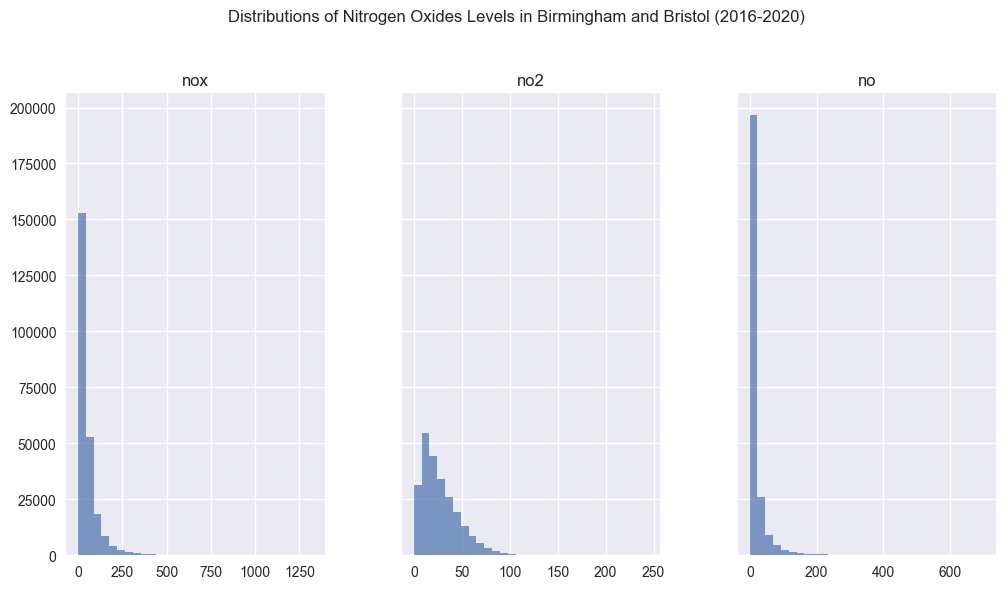

In [55]:
# Distribution plots of pollutants
df[['nox', 'no2', 'no']].hist(bins=30, figsize=(12, 6), alpha=0.7, layout=(1, 3), sharey=True)  
plt.suptitle('Distributions of Nitrogen Oxides Levels in Birmingham and Bristol (2016-2020)', y=1.02)
plt.show()

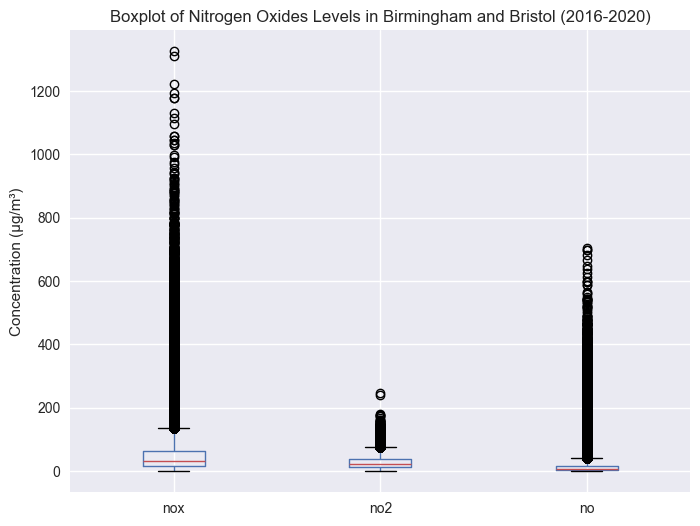

In [38]:
# Boxplot of pollutants
df[['nox', 'no2', 'no']].boxplot(figsize=(8, 6))
import matplotlib.pyplot as plt
plt.title('Boxplot of Nitrogen Oxides Levels in Birmingham and Bristol (2016-2020)')
plt.ylabel('Concentration (µg/m³)')
plt.show()

          nox       no2        no
nox  1.000000  0.798165  0.948862
no2  0.798165  1.000000  0.660036
no   0.948862  0.660036  1.000000


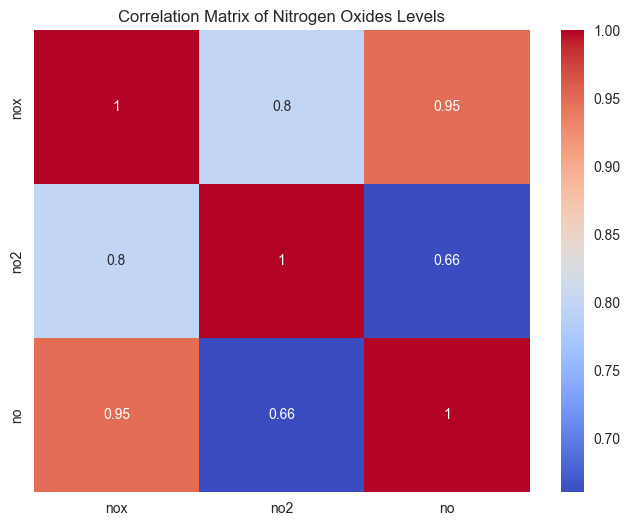

In [ ]:
# Correlation analysis  
print(df[['nox', 'no2', 'no']].corr())

# Correlation heatmap of pollutants
plt.figure(figsize=(8, 6))
sns.heatmap(df[['nox', 'no2', 'no']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Nitrogen Oxides Levels')
plt.show()


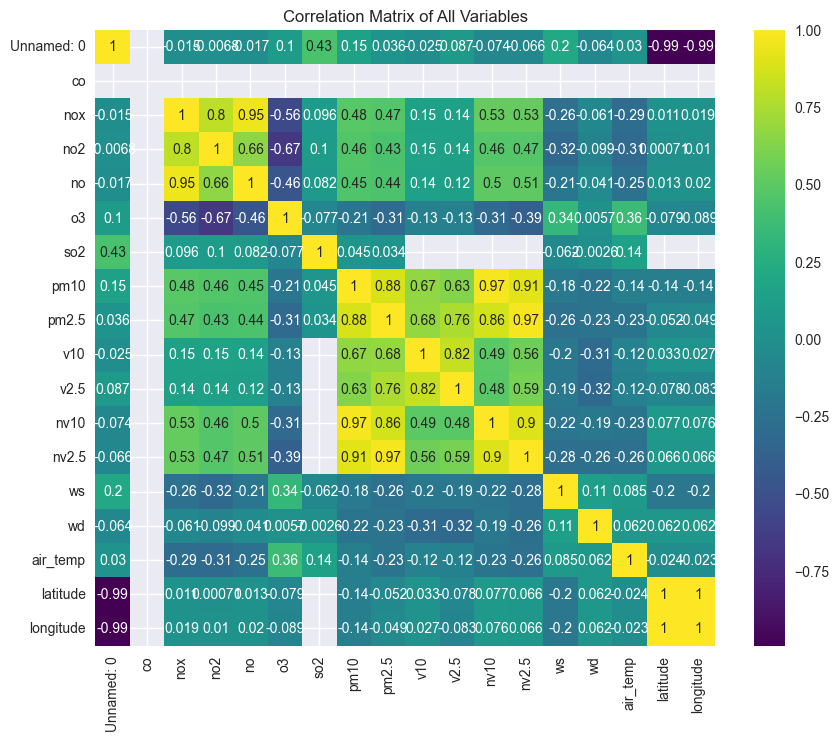

In [44]:
# Correlation heatmap of variables
df_corr = df.drop(columns=['site', 'code', 'site_type'])
plt.figure(figsize=(10, 8))
sns.heatmap(df_corr.corr(), annot=True, cmap='viridis')
plt.title('Correlation Matrix of All Variables')
plt.show()


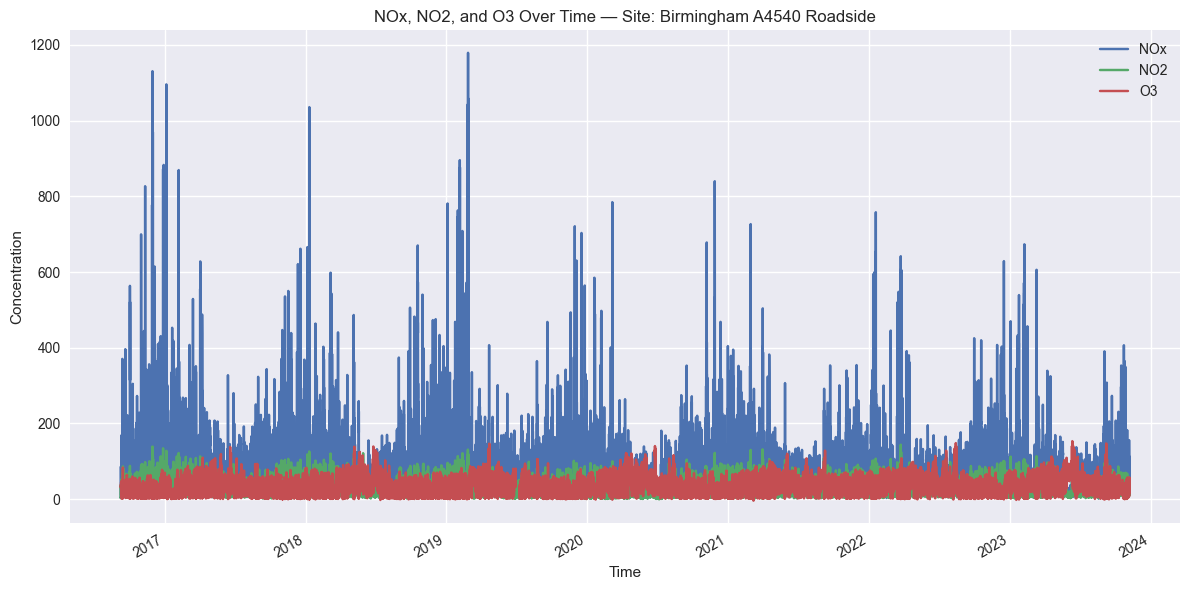

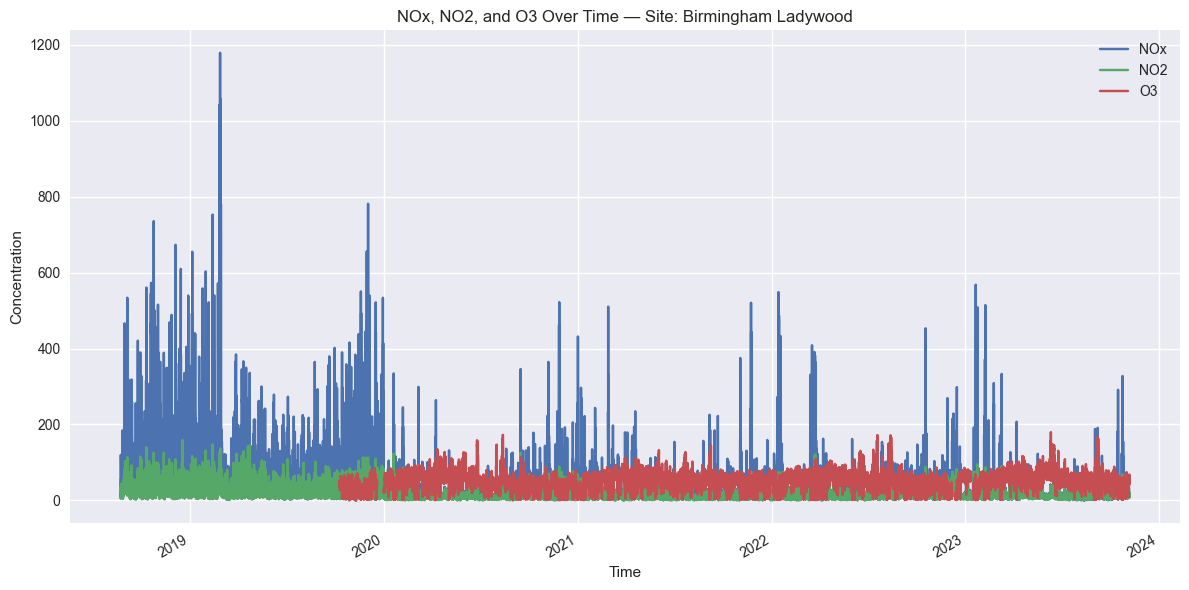

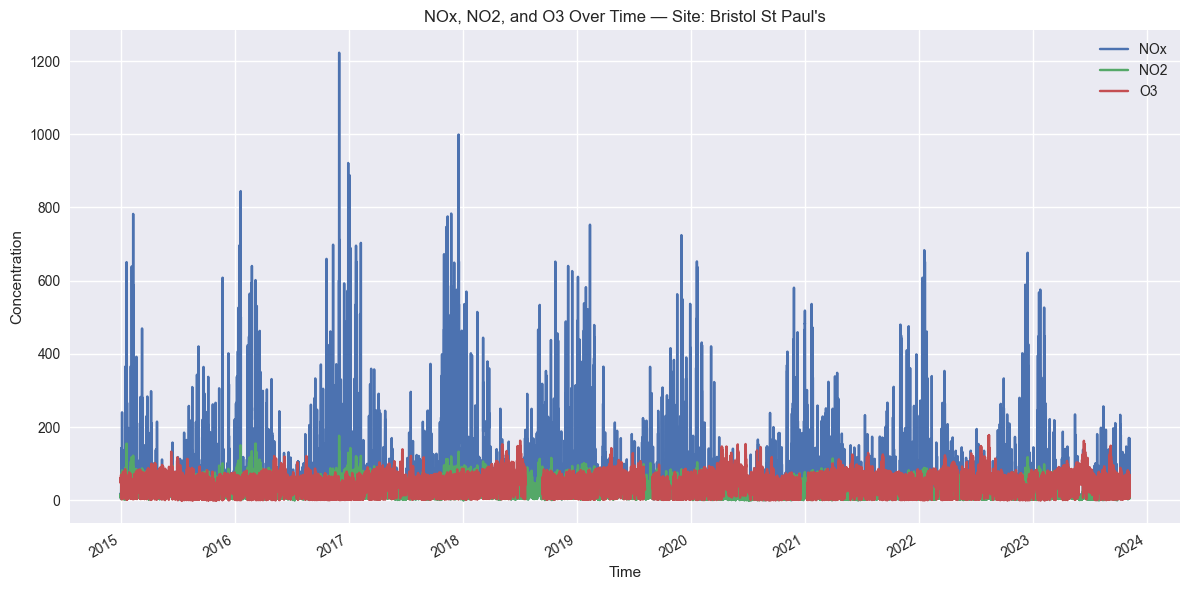

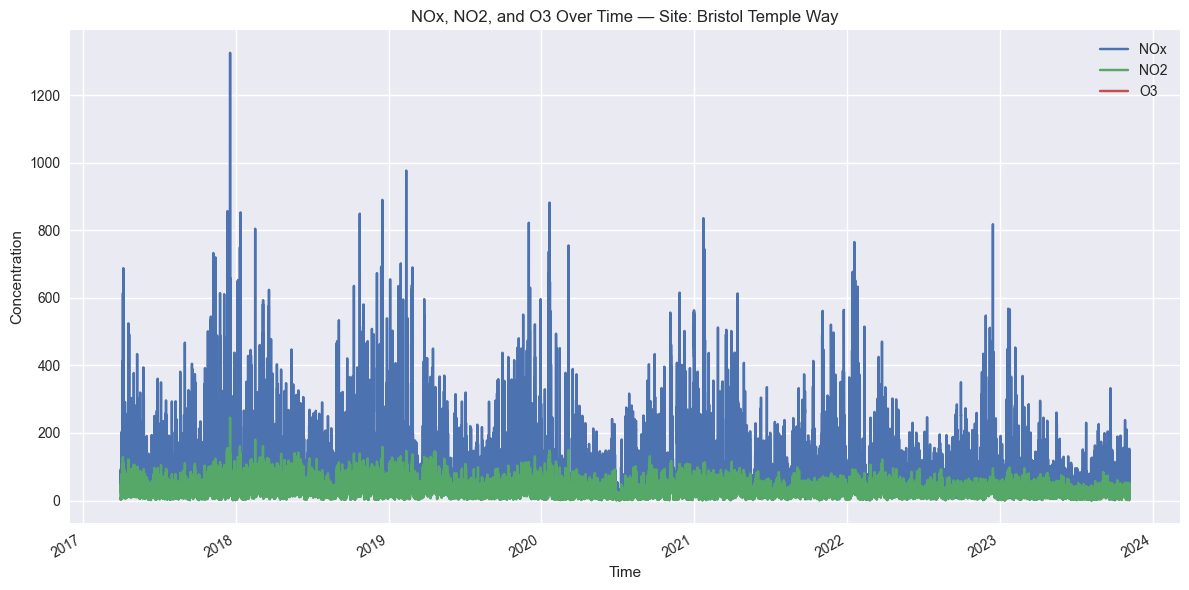

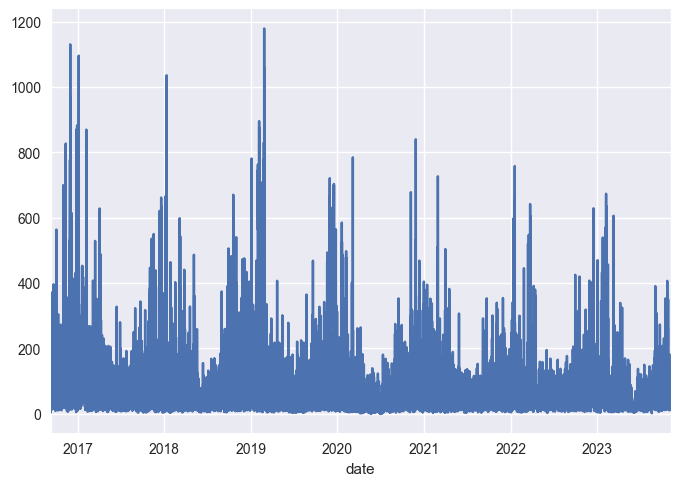

In [46]:
# let us plot the time series of nox, no2, and o3 for each site

for site in df['site'].unique():
    site_df = df[df['site'] == site]

    fig, ax = plt.subplots(figsize=(12, 6))

    ax.plot(site_df.index, site_df['nox'], label='NOx', linestyle='-')
    ax.plot(site_df.index, site_df['no2'], label='NO2', linestyle='-')
    ax.plot(site_df.index, site_df['o3'], label='O3', linestyle='-')

    ax.set_title(f'NOx, NO2, and O3 Over Time — Site: {site}')
    ax.set_xlabel('Time')
    ax.set_ylabel('Concentration')
    ax.legend()

    fig.autofmt_xdate()
    plt.tight_layout()
    plt.show()

df[df['site'] == df['site'].iloc[0]]['nox'].plot()
plt.show()

In [62]:
# This is to ensure nbformat is updated
!pip install nbformat>=4.2.0


In [ ]:
# Let us visualize relationships between locations and pollutants using scatter plots
coordinates = ['latitude', 'longitude']
for coord in coordinates:
    fig = px.scatter(df, x=coord, y='nox', color='site',
                     title=f'Relationship between {coord} and NOx Levels')
    fig.show()


---

### Feature Engineering, Selection and Scaling

* The following cells conduct Feature Engineering, Feature Selection and Feature Scaling to prepare the data for predictive analytics

In [68]:
# Feature Engineering and Selection
# We will drop irrelevant features based on variance and correlation analysis
corr = df_corr.corr()
importance_scores = corr['nox'].abs().sort_values(ascending=False)
print("Feature importance based on correlation with NOx:")
print(importance_scores)

Feature importance based on correlation with NOx:
nox           1.000000
no            0.948862
no2           0.798165
o3            0.557175
nv2.5         0.531611
nv10          0.526668
pm10          0.484880
pm2.5         0.467241
air_temp      0.287688
ws            0.257479
v10           0.150108
v2.5          0.136760
so2           0.095824
wd            0.061023
longitude     0.019104
Unnamed: 0    0.015470
latitude      0.011213
co                 NaN
Name: nox, dtype: float64


In [69]:
# print the relevant features to keep
relevant_features = importance_scores[importance_scores > 0.1].index.tolist()
relevant_features.remove("nox")  # Remove target variable
print("Relevant features based on correlation threshold:")
print(relevant_features)

Relevant features based on correlation threshold:
['no', 'no2', 'o3', 'nv2.5', 'nv10', 'pm10', 'pm2.5', 'air_temp', 'ws', 'v10', 'v2.5']


In [70]:
# Prepare final dataset for modeling
final_df = df[relevant_features + ['nox']].dropna()
final_df.head()

,no,no2,o3,nv2.5,nv10,pm10,pm2.5,air_temp,ws,v10,v2.5,nox
date,,,,,,,,,,,,
2018-08-11 00:00:00,14.25754,24.98695,26.21019,5.3,11.8,14.7,6.9,9.4,2.1,2.9,1.6,46.84821
2018-08-11 01:00:00,14.30846,25.37503,22.48489,4.4,7.9,11.0,5.7,8.8,2.2,3.1,1.3,47.31436
2018-08-11 02:00:00,8.86005,28.13533,16.21506,4.5,7.1,10.5,5.4,8.3,2.3,3.4,0.9,41.72055
2018-08-11 03:00:00,7.94349,27.90917,12.27356,2.6,6.6,8.2,3.0,7.8,2.1,1.6,0.4,40.08902
2018-08-11 04:00:00,23.18124,31.23211,7.33420,4.2,7.6,10.7,6.0,7.3,2.1,3.1,1.8,66.77618


In [71]:
# split the data into training and testing sets
X = final_df.drop(columns=['nox'])
y = final_df['nox']

In [72]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

---

### Predictive Analytics

* The following cells perform predictive air quality analytics in Birmingham and Bristol  
* One of the pollutants (NOx) is used as target for the model training

In [73]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [74]:
# Train a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [75]:
# Make predictions
y_pred = rf_model.predict(X_test)
# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
#print(f"Mean Squared Error of Random Forest Regressor: {mse}")
mae = mean_absolute_error(y_test, y_pred)
#print(f"Mean Absolute Error of Random Forest Regressor: {mae}")
rmse = np.sqrt(mse)
#print(f"Root Mean Squared Error of Random Forest Regressor: {rmse}")
print(f"Test MSE: {mse:.2f}, Test RMSE: {rmse:.2f}, MAE: {mae:.2f}")

Test MSE: 6.63, Test RMSE: 2.57, MAE: 0.34


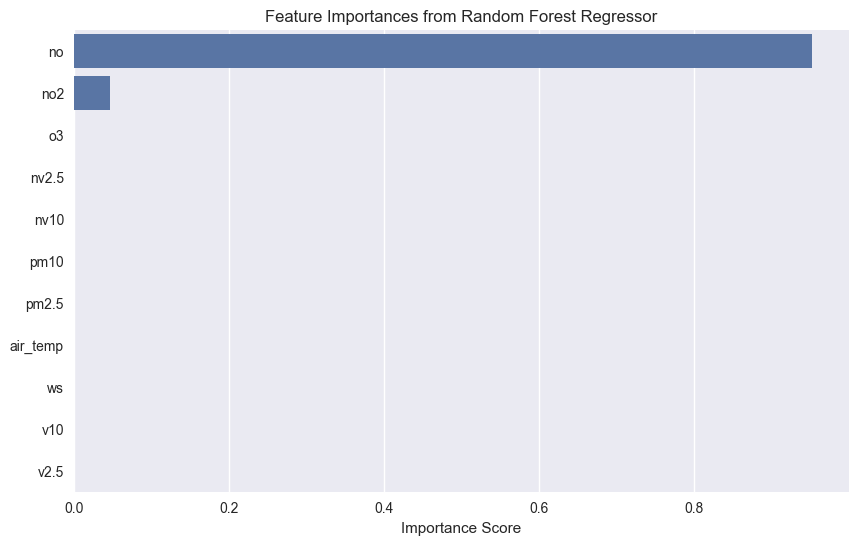

In [76]:
# Visualize feature importance
feature_importances = rf_model.feature_importances_
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=relevant_features)
plt.title('Feature Importances from Random Forest Regressor')
plt.xlabel('Importance Score')
plt.show()



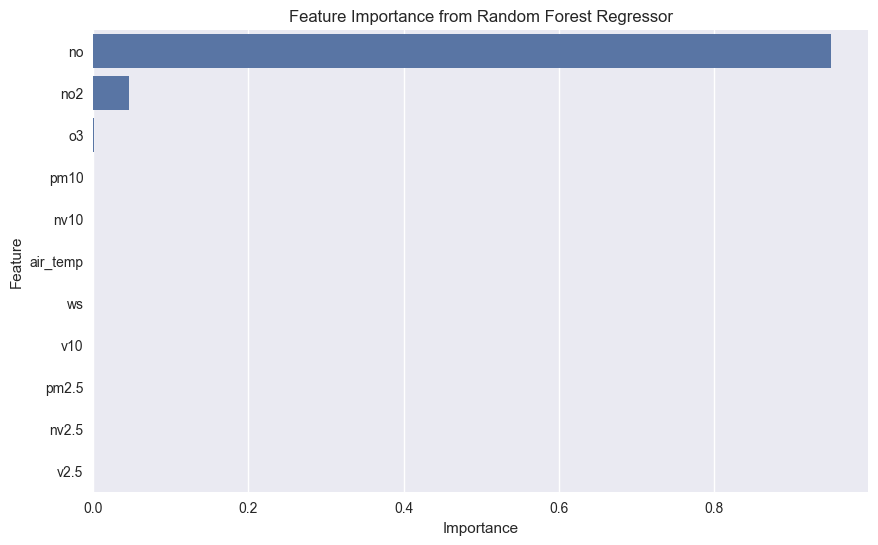

In [77]:
# Visualize feature importance with sorted features
feature_importances = rf_model.feature_importances_
importance_df = pd.DataFrame({
    "Feature": relevant_features,
    "Importance": feature_importances
}).sort_values(by="Importance", ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df)
plt.title("Feature Importance from Random Forest Regressor")
plt.show()

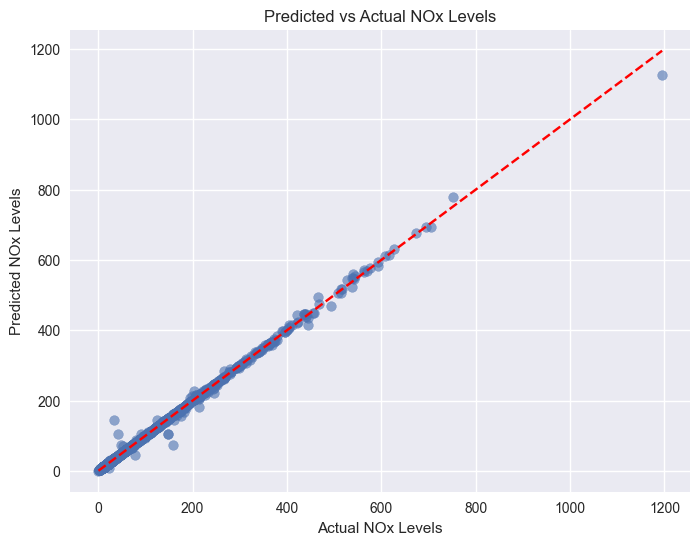

In [78]:
# Predicted vs Actual plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.xlabel('Actual NOx Levels')
plt.ylabel('Predicted NOx Levels')
plt.title('Predicted vs Actual NOx Levels')
plt.show()



In [ ]:
# Export predictions for Streamlit Dashboard
# Test set predictions (for nox_predictions.csv):

test_pred_nox = rf_model.predict(X_test)

nox_predictions = final_df[["date", "no"]].copy()
nox_predictions["true_nox"] = y_test.values
nox_predictions["pred_nox"] = test_pred_nox

nox_predictions.head()

In [ ]:
# Include relevant features for analytics page
for col in relevant_features:
    nox_predictions[col] = final_df[col].values

# Export Predictions
nox_predictions.head()
nox_predictions.to_csv("../data/nox_predictions.csv", index=False)

---